<a href="https://colab.research.google.com/github/DineshDevPandey/Pytorch_basics/blob/master/9_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A neural network with Input layer(2 inputs), a hidden layer(4 neurans) and a output layer.

In [0]:
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import torch.nn as nn

## Generate dataset

In [0]:
def generate_dataset(n_pts):

  # how many cluster you want(number of classes are there)
  centers = [[-0.5, 0.5],[0.5, -0.5]]
  X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape(500, 1))
  return (x_data, y_data, X, y)


## draw scatter plot

In [0]:
def scatter_plot(X, y):
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

## Linear model class

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
    
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
        return 1
    else:
        return 0
        
        

## Create model

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


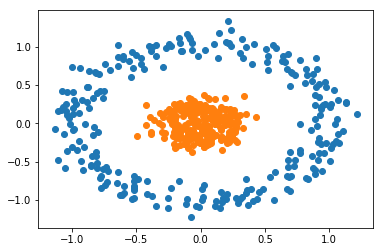

In [12]:
torch.manual_seed(2)
x_data, y_data, X, y = generate_dataset(n_pts=500)
model = Model(2, 4, 1)
print(list(model.parameters()))

## Defining loss and optimizer function

In [0]:
# binary cross entropy loss
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

## DNN training

In [17]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch: ', i, 'loss ', loss.item())

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss  0.03219376131892204
epoch:  1 loss  0.030534055083990097
epoch:  2 loss  0.0290041696280241
epoch:  3 loss  0.027612734586000443
epoch:  4 loss  0.02625438943505287
epoch:  5 loss  0.024975882843136787
epoch:  6 loss  0.023773781955242157
epoch:  7 loss  0.022613566368818283
epoch:  8 loss  0.02153049223124981
epoch:  9 loss  0.020530108362436295
epoch:  10 loss  0.019585492089390755
epoch:  11 loss  0.01869046501815319
epoch:  12 loss  0.01785285212099552
epoch:  13 loss  0.01706552878022194
epoch:  14 loss  0.016317913308739662
epoch:  15 loss  0.01561296358704567
epoch:  16 loss  0.014954479411244392
epoch:  17 loss  0.014336624182760715
epoch:  18 loss  0.013753145933151245
epoch:  19 loss  0.013203581795096397
epoch:  20 loss  0.012687692418694496
epoch:  21 loss  0.012201179750263691
epoch:  22 loss  0.011739945970475674
epoch:  23 loss  0.011303538456559181
epoch:  24 loss  0.010892692022025585
epoch:  25 loss  0.010505910962820053
epoch:  26 loss  0.010140296071

## Loss plot

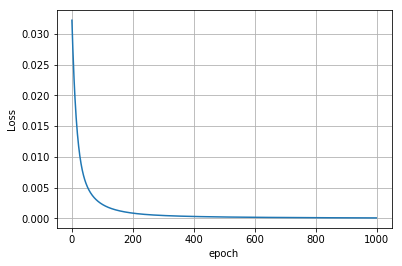

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()